In [3]:
# !pip install spotipy

In [4]:
# pip install scikit-learn

In [5]:
#nj - url https://open.spotify.com/playlist/37i9dQZF1EJEENiXSiUJNC?si=4f1e03b41a654958

# birthday - url : https://open.spotify.com/playlist/2j02Hr9EK6CtOj79Yy7XMe?si=9be6775c8a754e48

#playlist ID 
# nj playlist = 37i9dQZF1EJEENiXSiUJNC 
# bday playlist = 2j02Hr9EK6CtOj79Yy7XMe
# Latin indie PL = 3PdZ2o7zuWvsozdBvtOblv

# client_id = '2a5a37ada864405cba1dbbb8f58aca4d' 
# client_secret = '8d0569335fef4aa196aa3d8961a9acaa' 

#ran using splinter env

# source splinter/bin/activate

In [6]:

import json
import spotipy
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials

client_id = '2a5a37ada864405cba1dbbb8f58aca4d' 
client_secret = '8d0569335fef4aa196aa3d8961a9acaa' 

client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

playlist_id='3PdZ2o7zuWvsozdBvtOblv' 
results = sp.playlist(playlist_id)

In [7]:
# create a list of song ids
ids=[]

for item in results['tracks']['items']:
        track = item['track']['id']
        ids.append(track)
        
song_meta={'id':[],'album':[], 'name':[], 
           'artist':[],'explicit':[],'popularity':[]}

for song_id in ids:
    # get song's meta data
    meta = sp.track(song_id)
    
    # song id
    song_meta['id'].append(song_id)

    # album name
    album=meta['album']['name']
    song_meta['album']+=[album]

    # song name
    song=meta['name']
    song_meta['name']+=[song]
    
    # artists name
    s = ', '
    artist=s.join([singer_name['name'] for singer_name in meta['artists']])
    song_meta['artist']+=[artist]
    
    # explicit: lyrics could be considered offensive or unsuitable for children
    explicit=meta['explicit']
    song_meta['explicit'].append(explicit)
    
    # song popularity
    popularity=meta['popularity']
    song_meta['popularity'].append(popularity)

song_meta_df=pd.DataFrame.from_dict(song_meta)

# check the song feature
features = sp.audio_features(song_meta['id'])
# change dictionary to dataframe
features_df=pd.DataFrame.from_dict(features)

# convert milliseconds to mins
# duration_ms: The duration of the track in milliseconds.
# 1 minute = 60 seconds = 60 × 1000 milliseconds = 60,000 ms
features_df['duration_ms']=features_df['duration_ms']/60000

# combine two dataframe
final_df=song_meta_df.merge(features_df)

final_df.head(10)

,id,album,name,artist,explicit,popularity,danceability,energy,key,loudness,...,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,6LOZws7T3jqZz78unPgFF9,Isolation,Dead To Me,Kali Uchis,False,79,0.675,0.761,4,-4.469,...,0.000000,0.1020,0.428,119.001,audio_features,spotify:track:6LOZws7T3jqZz78unPgFF9,https://api.spotify.com/v1/tracks/6LOZws7T3jqZ...,https://api.spotify.com/v1/audio-analysis/6LOZ...,3.325100,4
1,7ukQ49ilGpTfivGRtYda4E,Regresa,Nydia,Buscabulla,False,36,0.682,0.605,1,-9.343,...,0.480000,0.1140,0.364,108.956,audio_features,spotify:track:7ukQ49ilGpTfivGRtYda4E,https://api.spotify.com/v1/tracks/7ukQ49ilGpTf...,https://api.spotify.com/v1/audio-analysis/7ukQ...,4.233083,4
2,55DyBUkjebkcYhDGfEXitR,Cariño,Cariño,The Marías,False,11,0.647,0.385,0,-13.717,...,0.056900,0.1170,0.660,113.982,audio_features,spotify:track:55DyBUkjebkcYhDGfEXitR,https://api.spotify.com/v1/tracks/55DyBUkjebkc...,https://api.spotify.com/v1/audio-analysis/55Dy...,4.311900,4
3,1jecO8NeYLsVWVptITz4c1,Tú,Tú,maye,False,65,0.732,0.555,5,-7.973,...,0.000000,0.1120,0.730,114.982,audio_features,spotify:track:1jecO8NeYLsVWVptITz4c1,https://api.spotify.com/v1/tracks/1jecO8NeYLsV...,https://api.spotify.com/v1/audio-analysis/1jec...,3.443533,4
4,0btkyN6uJvHFdRxlVrUaJv,Nubes,Nubes,Nicole Horts,False,5,0.820,0.361,8,-8.049,...,0.000000,0.0941,0.426,105.034,audio_features,spotify:track:0btkyN6uJvHFdRxlVrUaJv,https://api.spotify.com/v1/tracks/0btkyN6uJvHF...,https://api.spotify.com/v1/audio-analysis/0btk...,2.900883,4
5,70VXWtjr5ADUrqfJG2B4VX,Tornaluna,Malas Amistades,Vanessa Zamora,False,0,0.772,0.371,8,-10.258,...,0.000000,0.1190,0.811,75.988,audio_features,spotify:track:70VXWtjr5ADUrqfJG2B4VX,https://api.spotify.com/v1/tracks/70VXWtjr5ADU...,https://api.spotify.com/v1/audio-analysis/70VX...,4.167883,4
6,09PyIVzV0oQlDkXwvFExDB,Fantasmas,Fantasmas,Ambar Lucid,False,0,0.497,0.422,0,-6.844,...,0.000003,0.1940,0.113,81.501,audio_features,spotify:track:09PyIVzV0oQlDkXwvFExDB,https://api.spotify.com/v1/tracks/09PyIVzV0oQl...,https://api.spotify.com/v1/audio-analysis/09Py...,3.724433,3
7,4cJOLN346rtOty3UPACsao,I Don't Know You,I Don't Know You,The Marías,False,5,0.884,0.333,9,-9.753,...,0.020500,0.1030,0.587,118.065,audio_features,spotify:track:4cJOLN346rtOty3UPACsao,https://api.spotify.com/v1/tracks/4cJOLN346rtO...,https://api.spotify.com/v1/audio-analysis/4cJO...,3.490833,4
8,4p1Er46wDz4zGQI7Sxor3W,Unbothered,Unbothered,Omar Apollo,False,0,0.641,0.487,2,-7.098,...,0.002230,0.1330,0.322,108.933,audio_features,spotify:track:4p1Er46wDz4zGQI7Sxor3W,https://api.spotify.com/v1/tracks/4p1Er46wDz4z...,https://api.spotify.com/v1/audio-analysis/4p1E...,2.082567,4
9,3oyf4dalm17kzTE8LJDbgR,Lo Que Siento,Lo Que Siento,Cuco,False,1,0.326,0.685,10,-5.576,...,0.000000,0.4270,0.409,86.882,audio_features,spotify:track:3oyf4dalm17kzTE8LJDbgR,https://api.spotify.com/v1/tracks/3oyf4dalm17k...,https://api.spotify.com/v1/audio-analysis/3oyf...,5.200000,5


In [8]:
#average value for each category

music_feature= features_df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]
music_feature.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,0.662418,0.510018,-9.184473,0.076096,0.445578,0.107905,0.155275,0.481273,109.031327,3.520415
std,0.128124,0.174674,2.656453,0.068794,0.274698,0.214360,0.099892,0.229445,28.989158,0.722024
min,0.326000,0.127000,-18.559000,0.024500,0.019900,0.000000,0.045400,0.109000,61.011000,1.706200
25%,0.591000,0.387500,-10.270500,0.032450,0.218500,0.000003,0.103000,0.337000,84.969000,3.128142
50%,0.675000,0.498000,-8.803000,0.049100,0.442000,0.001790,0.119000,0.425000,105.034000,3.538300
75%,0.734000,0.649500,-7.666500,0.077400,0.677500,0.039950,0.171500,0.683500,119.147500,4.041500
max,0.884000,0.874000,-4.469000,0.329000,0.988000,0.824000,0.601000,0.900000,185.841000,5.200000


In [9]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
music_feature.loc[:]=min_max_scaler.fit_transform(music_feature.loc[:])

### Creating a Radar Chart
-----


In [10]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl
from matplotlib import colormaps
# list(colormaps)

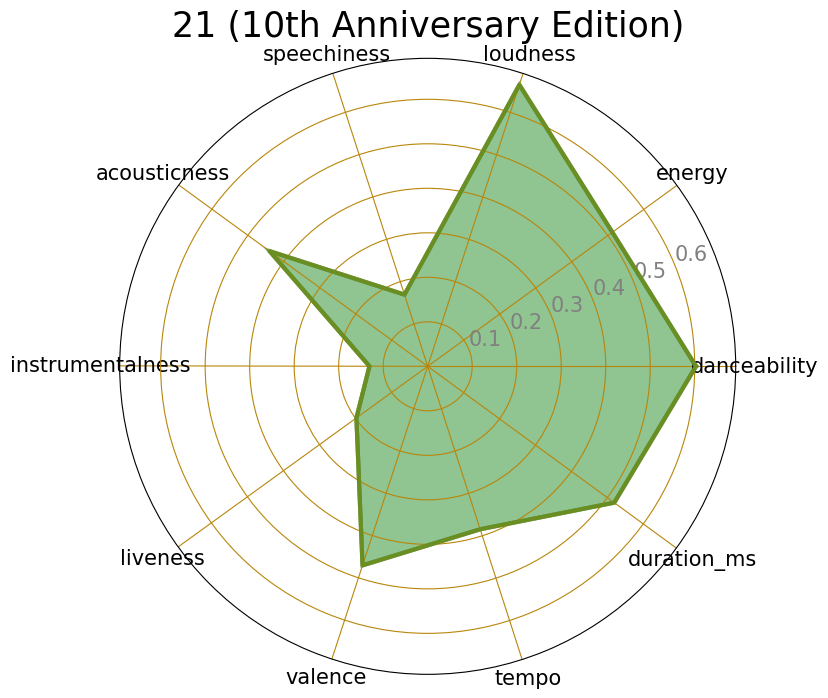

In [11]:
# plot size
fig=plt.figure(figsize=(12,8))

# convert column names into a list
categories=list(music_feature.columns)
# number of categories
N=len(categories)

# create a list with the average of all features
value=list(music_feature.mean())

# repeat first value to close the circle
# the plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
value+=value[:1]
pi= 3.14 # define pi as a numerical variable


# calculate angle for each category
angles=[n/float(N)*2*pi for n in range(N)]
angles+=angles[:1]

# plot
plt.polar(angles, value, color="olivedrab", lw=3, label="a line")
plt.fill(angles,value,alpha=0.5, facecolor='forestgreen', edgecolor='darkgreen', linewidth=3)


plt.title('21 (10th Anniversary Edition)', size=25)

plt.xticks(angles[:-1],categories, size=15)
plt.yticks(color='grey',size=15)
plt.tick_params(grid_color='darkgoldenrod')
plt.show()

## Album Analysis
----


In [12]:
# import json
# import spotipy
# import pandas as pd
# from spotipy.oauth2 import SpotifyClientCredentials

# # client_id = '2a5a37ada864405cba1dbbb8f58aca4d' 
# # client_secret = '8d0569335fef4aa196aa3d8961a9acaa' 

# client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
# sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

album_id='3RQQmkQEvNCY4prGKE6oc5' # Un Verano Sin Ti Allbum ID :P
album_results = sp.album(album_id)

In [13]:
# create a list of song ids
album_ids=[]

for album_result in album_results['tracks']['items']:
    album_track = str(album_result['id'])  # corrected line
    album_ids.append(album_track)
        
album_song_meta={'id':[],'album':[], 'name':[], 
           'artist':[],'explicit':[],'popularity':[]}

for song_ids in album_ids:
    # get song's meta data
    album_meta = sp.track(song_ids)
    
    # song id
    album_song_meta['id'].append(song_ids)

    # album name
    album_album=meta['album']['name']
    album_song_meta['album']+=[album_album]

    # song name
    album_song=meta['name']
    album_song_meta['name']+=[album_song]
    
    # artists name
    a_s = ', '
    album_artist=a_s.join([album_singer_name['name'] for album_singer_name in album_meta['artists']])
    album_song_meta['artist']+=[album_artist]
    
    # explicit: lyrics could be considered offensive or unsuitable for children
    album_explicit=meta['explicit']
    album_song_meta['explicit'].append(album_explicit)
    
    # song popularity
    album_popularity=album_meta['popularity']
    album_song_meta['popularity'].append(album_popularity)

album_song_meta_df=pd.DataFrame.from_dict(album_song_meta)

# check the song feature
album_features = sp.audio_features(album_song_meta['id'])
# change dictionary to dataframe
album_features_df=pd.DataFrame.from_dict(album_features)

# convert milliseconds to mins
# duration_ms: The duration of the track in milliseconds.
# 1 minute = 60 seconds = 60 × 1000 milliseconds = 60,000 ms
album_features_df['duration_ms']=album_features_df['duration_ms']/60000

# combine two dataframe
album_final_df=album_song_meta_df.merge(album_features_df)

album_final_df.head(10)

,id,album,name,artist,explicit,popularity,danceability,energy,key,loudness,...,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,6Xom58OOXk2SoU711L2IXO,Regresa,Ta Que Tiembla,Bad Bunny,False,83,0.804,0.674,5,-5.453,...,0.000001,0.1150,0.292,99.968,audio_features,spotify:track:6Xom58OOXk2SoU711L2IXO,https://api.spotify.com/v1/tracks/6Xom58OOXk2S...,https://api.spotify.com/v1/audio-analysis/6Xom...,4.099000,4
1,1dm6z1fWB0cErMszU25dy2,Regresa,Ta Que Tiembla,Bad Bunny,False,77,0.564,0.903,5,-3.221,...,0.000000,0.1750,0.607,78.293,audio_features,spotify:track:1dm6z1fWB0cErMszU25dy2,https://api.spotify.com/v1/tracks/1dm6z1fWB0cE...,https://api.spotify.com/v1/audio-analysis/1dm6...,3.840000,4
2,6Sq7ltF9Qa7SNFBsV5Cogx,Regresa,Ta Que Tiembla,"Bad Bunny, Chencho Corleone",False,88,0.911,0.712,1,-5.105,...,0.000027,0.0933,0.425,92.005,audio_features,spotify:track:6Sq7ltF9Qa7SNFBsV5Cogx,https://api.spotify.com/v1/tracks/6Sq7ltF9Qa7S...,https://api.spotify.com/v1/audio-analysis/6Sq7...,2.976117,4
3,1IHWl5LamUGEuP4ozKQSXZ,Regresa,Ta Que Tiembla,Bad Bunny,False,84,0.650,0.715,5,-5.198,...,0.000291,0.1260,0.187,106.672,audio_features,spotify:track:1IHWl5LamUGEuP4ozKQSXZ,https://api.spotify.com/v1/tracks/1IHWl5LamUGE...,https://api.spotify.com/v1/audio-analysis/1IHW...,4.061950,4
4,5CzixCxDkRXX9mScCmah8O,Regresa,Ta Que Tiembla,Bad Bunny,False,76,0.787,0.546,0,-7.094,...,0.000046,0.1220,0.222,93.050,audio_features,spotify:track:5CzixCxDkRXX9mScCmah8O,https://api.spotify.com/v1/tracks/5CzixCxDkRXX...,https://api.spotify.com/v1/audio-analysis/5Czi...,2.948933,4
5,5kVZxyMY1gfdCLiChsfjn1,Regresa,Ta Que Tiembla,Bad Bunny,False,75,0.872,0.588,0,-6.276,...,0.000000,0.1700,0.930,142.004,audio_features,spotify:track:5kVZxyMY1gfdCLiChsfjn1,https://api.spotify.com/v1/tracks/5kVZxyMY1gfd...,https://api.spotify.com/v1/audio-analysis/5kVZ...,3.845067,4
6,41oY4WCTj5kccfesTVFnvN,Regresa,Ta Que Tiembla,"Bad Bunny, Jhayco",False,80,0.795,0.684,11,-3.971,...,0.000000,0.6580,0.419,114.011,audio_features,spotify:track:41oY4WCTj5kccfesTVFnvN,https://api.spotify.com/v1/tracks/41oY4WCTj5kc...,https://api.spotify.com/v1/audio-analysis/41oY...,3.964917,4
7,31i56LZnwE6uSu3exoHjtB,Regresa,Ta Que Tiembla,Bad Bunny,False,81,0.876,0.498,10,-7.511,...,0.000000,0.1430,0.428,122.016,audio_features,spotify:track:31i56LZnwE6uSu3exoHjtB,https://api.spotify.com/v1/tracks/31i56LZnwE6u...,https://api.spotify.com/v1/audio-analysis/31i5...,2.885317,4
8,1797zYiX4cKosMH836X9Gt,Regresa,Ta Que Tiembla,"Bad Bunny, Tony Dize",False,79,0.663,0.786,11,-3.510,...,0.000000,0.2190,0.579,196.120,audio_features,spotify:track:1797zYiX4cKosMH836X9Gt,https://api.spotify.com/v1/tracks/1797zYiX4cKo...,https://api.spotify.com/v1/audio-analysis/1797...,3.306117,4
9,5Eax0qFko2dh7Rl2lYs3bx,Regresa,Ta Que Tiembla,Bad Bunny,False,84,0.801,0.475,7,-8.797,...,0.000017,0.0639,0.234,98.047,audio_features,spotify:track:5Eax0qFko2dh7Rl2lYs3bx,https://api.spotify.com/v1/tracks/5Eax0qFko2dh...,https://api.spotify.com/v1/audio-analysis/5Eax...,3.551017,4


In [14]:
#average value for each category

album_music_feature= album_features_df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]
album_music_feature.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,23.000000,23.000000,23.000000,23.000000,23.000000,2.300000e+01,23.000000,23.000000,23.000000,23.000000
mean,0.756652,0.657391,-6.060696,0.119965,0.258104,2.487178e-04,0.216961,0.484826,118.279391,3.558820
std,0.111145,0.104325,1.822413,0.108761,0.218932,4.657825e-04,0.166584,0.197760,32.666493,0.717216
min,0.503000,0.475000,-10.229000,0.033300,0.015100,0.000000e+00,0.063900,0.187000,78.293000,2.317350
25%,0.656500,0.591500,-7.027000,0.049900,0.091500,5.900000e-07,0.106450,0.352000,97.530000,2.995808
50%,0.797000,0.670000,-5.493000,0.061500,0.207000,8.330000e-06,0.143000,0.451000,108.020000,3.516483
75%,0.834000,0.705000,-4.926500,0.155000,0.330500,2.920000e-04,0.246000,0.603000,126.037000,4.013433
max,0.911000,0.903000,-3.221000,0.375000,0.762000,1.660000e-03,0.658000,0.930000,196.120000,5.660200


In [15]:
# from sklearn.preprocessing import MinMaxScaler
album_min_max_scaler = MinMaxScaler()
album_music_feature.loc[:]=album_min_max_scaler.fit_transform(album_music_feature.loc[:])

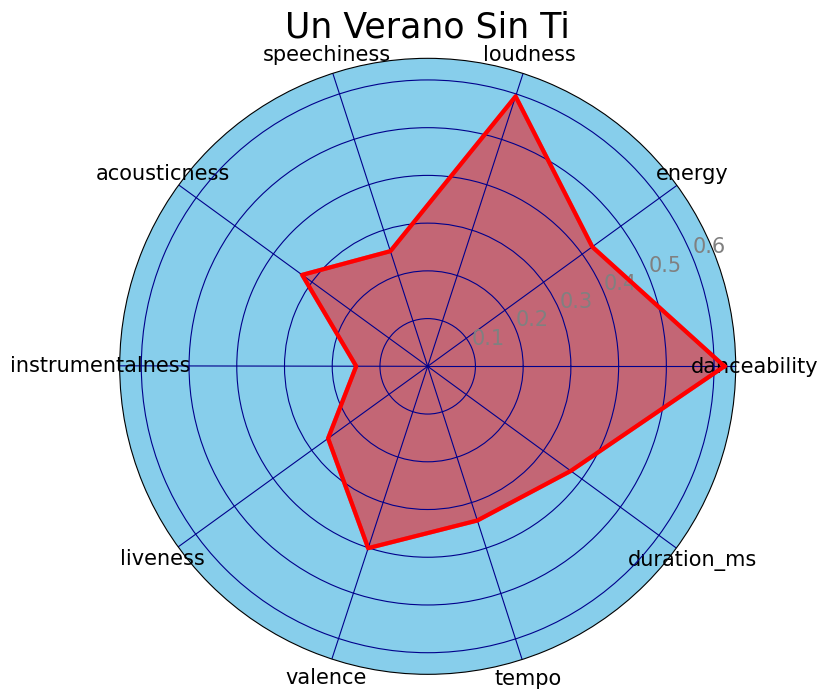

In [25]:
# plot size
album_fig=plt.figure(figsize=(12,8))


# convert column names into a list
album_categories=list(album_music_feature.columns)
# number of categories
N=len(album_categories)

# create a list with the average of all features
album_value=list(album_music_feature.mean())

# repeat first value to close the circle
# the plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
album_value+=album_value[:1]
pi= 3.14 # define pi as a numerical variable


# calculate angle for each category
album_angles=[n/float(N)*2*pi for n in range(N)]
album_angles+=album_angles[:1]

# plot
plt.polar(album_angles, album_value, color="red", lw=3, label="a line")
plt.fill(album_angles,album_value,alpha=0.5, facecolor='red', edgecolor='red', linewidth=3)

# set the background color to 'skyblue'
plt.gca().set_facecolor('skyblue')

plt.title('Un Verano Sin Ti', size=25)

plt.xticks(album_angles[:-1],album_categories, size=15)
plt.yticks(color='grey',size=15)
plt.tick_params(grid_color='darkblue')
plt.show()